<Figure size 1000x1000 with 0 Axes>

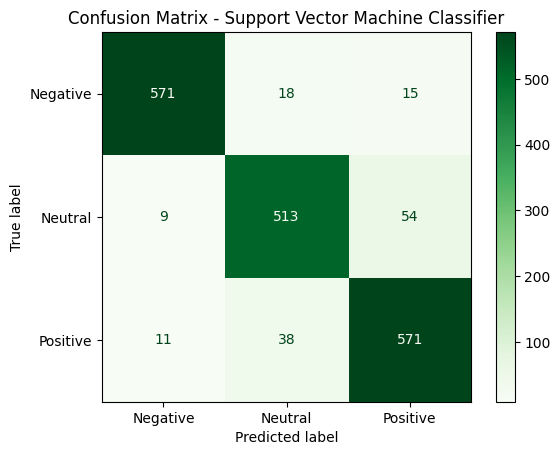

Accuracy on Test Data: 91.94%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       604
           1       0.90      0.89      0.90       576
           2       0.89      0.92      0.91       620

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.92      0.92      0.92      1800

ROC AUC Score: 0.9766237197675868
Log Loss: 0.2701736710436672
Error Rate: 0.0805555555555556
Class 0:
TPR (Sensitivity): 0.945364238410596
TNR (Specificity): 0.9832775919732442
FPR: 0.016722408026755852
FNR: 0.054635761589403975
Class 1:
TPR (Sensitivity): 0.890625
TNR (Specificity): 0.954248366013072
FPR: 0.0457516339869281
FNR: 0.109375
Class 2:
TPR (Sensitivity): 0.9209677419354839
TNR (Specificity): 0.9415254237288135
FPR: 0.05847457627118644
FNR: 0.07903225806451612


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from sklearn.preprocessing import LabelBinarizer


# Function to normalize text
def simple_normalize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Load the dataset
new_data_latest = pd.read_csv('/content/Dataset.csv')

# Normalize the reviews in the dataset
new_data_latest['normalized_review'] = new_data_latest['Reviews'].apply(simple_normalize_text)

# Clean the dataset by dropping rows with missing sentiments
new_data_latest_cleaned = new_data_latest.dropna(subset=['Sentiment'])

# Ensure the sentiments are numeric and drop rows with non-numeric sentiments
new_data_latest_cleaned = new_data_latest_cleaned[pd.to_numeric(new_data_latest_cleaned['Sentiment'], errors='coerce').notnull()]

# Convert sentiments to integers
new_data_latest_cleaned['Sentiment'] = new_data_latest_cleaned['Sentiment'].astype(int)

# Split the cleaned dataset into features (X) and labels (y)
X_new_latest = new_data_latest_cleaned['normalized_review']
y_new_latest = new_data_latest_cleaned['Sentiment']

# Vectorize the text data
vectorizer_previous = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_new_vec_latest = vectorizer_previous.fit_transform(X_new_latest)

# Split the vectorized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new_vec_latest, y_new_latest, test_size=0.2, random_state=45)

# Train and evaluate SVM model
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Support Vector Machine Classifier")
plt.savefig("SVM_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)






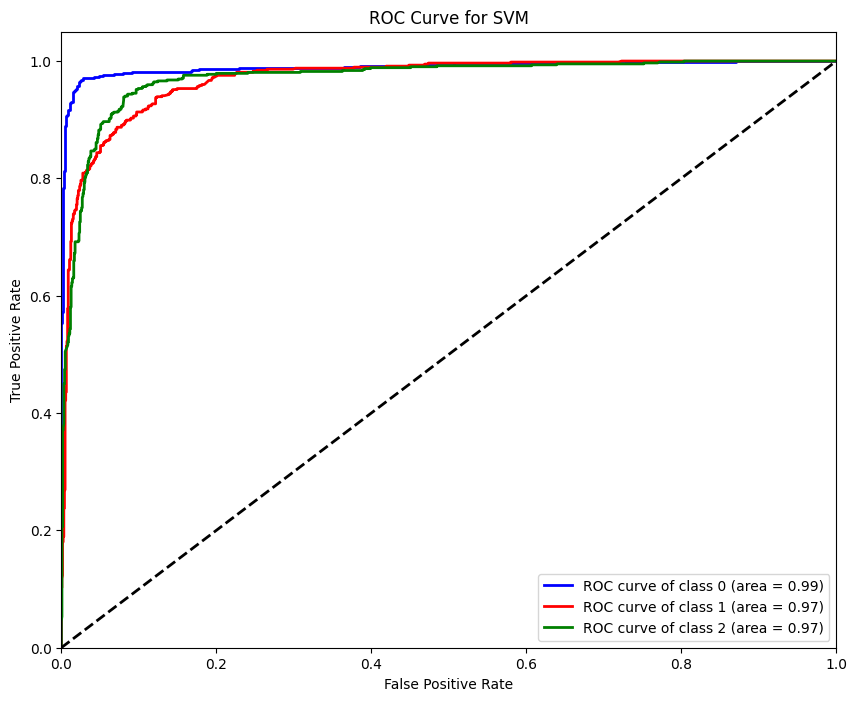

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.savefig("SVM_ROC_Curve.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1000x1000 with 0 Axes>

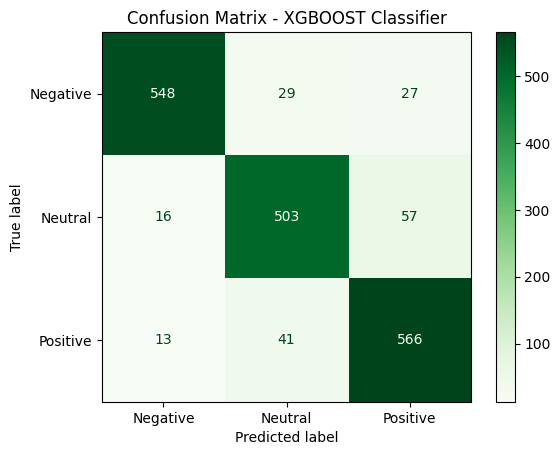

Accuracy on Test Data: 89.83%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       604
           1       0.88      0.87      0.88       576
           2       0.87      0.91      0.89       620

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800

ROC AUC Score: 0.9745161392898908
Log Loss: 0.2972885993897141
Error Rate: 0.10166666666666668
Class 0:
TPR (Sensitivity): 0.9072847682119205
TNR (Specificity): 0.975752508361204
FPR: 0.024247491638795988
FNR: 0.09271523178807947
Class 1:
TPR (Sensitivity): 0.8732638888888888
TNR (Specificity): 0.9428104575163399
FPR: 0.05718954248366013
FNR: 0.1267361111111111
Class 2:
TPR (Sensitivity): 0.9129032258064517
TNR (Specificity): 0.9288135593220339
FPR: 0.0711864406779661
FNR: 0.08709677419354839


In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=501, objective='multi:softprob', num_class=3, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - XGBOOST Classifier")
plt.savefig("XGBOOST_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)


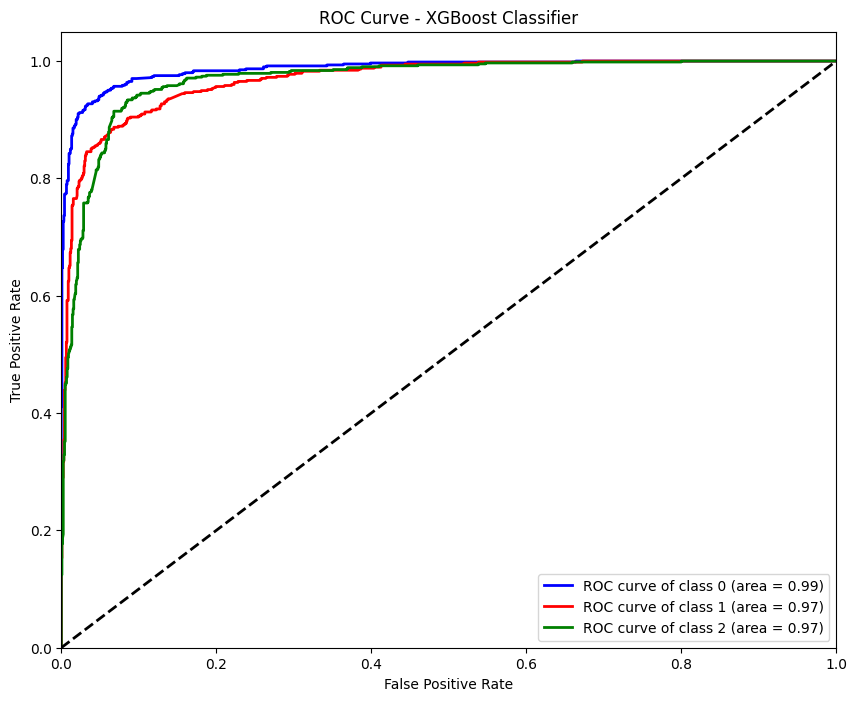

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.savefig("XGBOOST_ROC_Curve.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1000x1000 with 0 Axes>

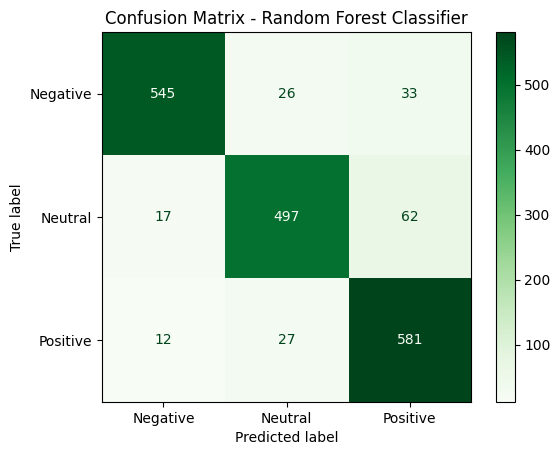

Accuracy on Test Data: 90.17%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       604
           1       0.90      0.86      0.88       576
           2       0.86      0.94      0.90       620

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800

ROC AUC Score: 0.9746510131035366
Log Loss: 0.3494989847660588
Error Rate: 0.09833333333333338
Class 0:
TPR (Sensitivity): 0.902317880794702
TNR (Specificity): 0.975752508361204
FPR: 0.024247491638795988
FNR: 0.09768211920529801
Class 1:
TPR (Sensitivity): 0.8628472222222222
TNR (Specificity): 0.9566993464052288
FPR: 0.04330065359477124
FNR: 0.1371527777777778
Class 2:
TPR (Sensitivity): 0.9370967741935484
TNR (Specificity): 0.9194915254237288
FPR: 0.08050847457627118
FNR: 0.06290322580645161


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=501, criterion='entropy', random_state = 42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.savefig("RandomForestClassifier_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)

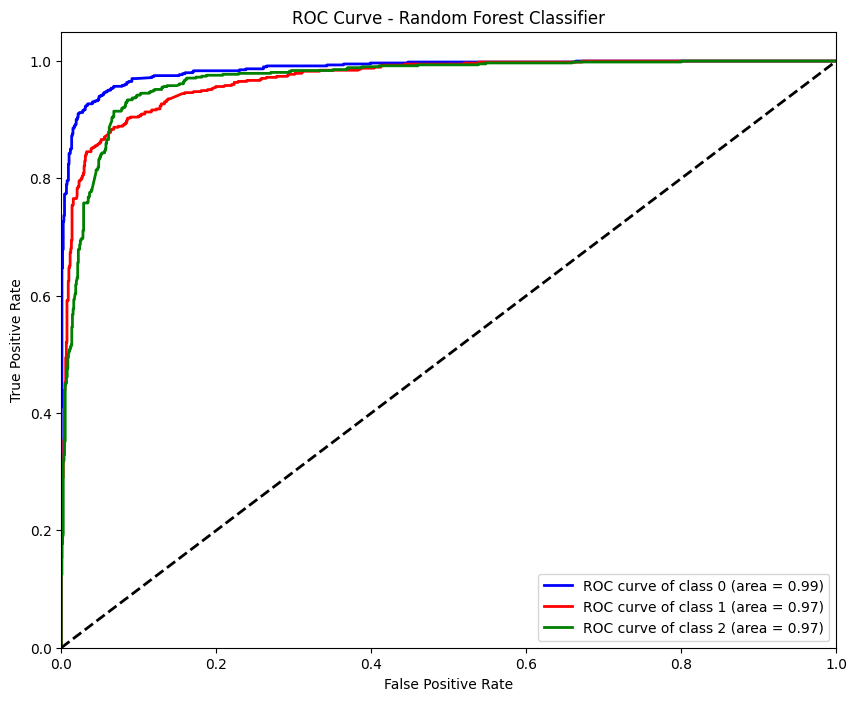

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig("RandomForest_ROC_Curve.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1000x1000 with 0 Axes>

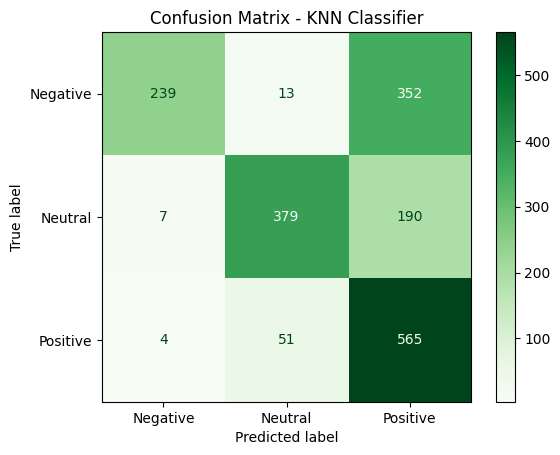

Accuracy on Test Data: 65.72%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      0.40      0.56       604
           1       0.86      0.66      0.74       576
           2       0.51      0.91      0.65       620

    accuracy                           0.66      1800
   macro avg       0.77      0.65      0.65      1800
weighted avg       0.77      0.66      0.65      1800

ROC AUC Score: 0.7880145416374891
Log Loss: 7.712989783772965
Error Rate: 0.34277777777777774
Class 0:
TPR (Sensitivity): 0.3956953642384106
TNR (Specificity): 0.9908026755852842
FPR: 0.00919732441471572
FNR: 0.6043046357615894
Class 1:
TPR (Sensitivity): 0.6579861111111112
TNR (Specificity): 0.9477124183006536
FPR: 0.05228758169934641
FNR: 0.3420138888888889
Class 2:
TPR (Sensitivity): 0.9112903225806451
TNR (Specificity): 0.5406779661016949
FPR: 0.45932203389830506
FNR: 0.08870967741935484


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - KNN Classifier")
plt.savefig("KNN_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)

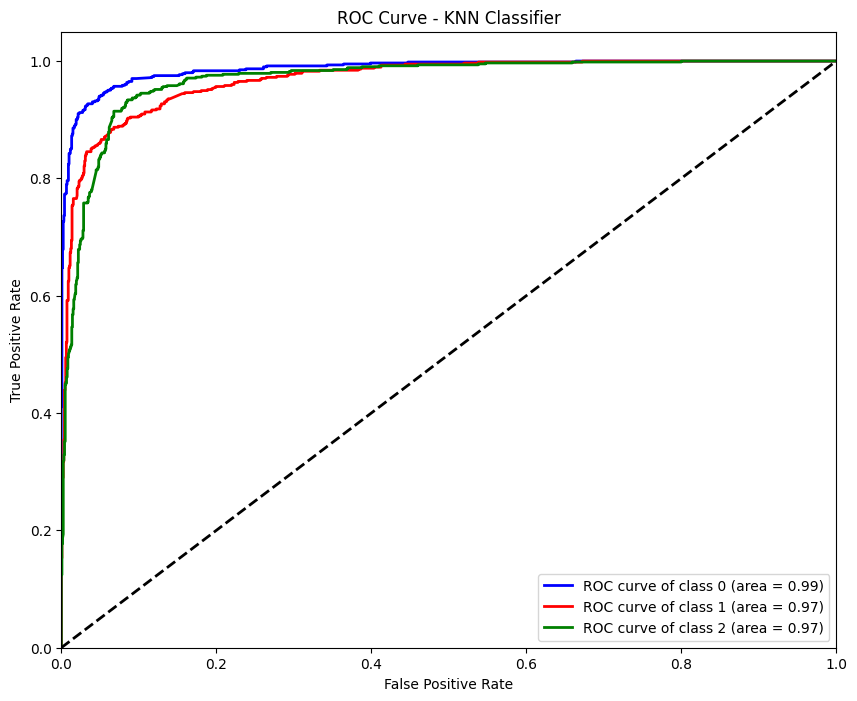

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc="lower right")
plt.savefig("KNN_ROC_Curve.png", dpi=300, bbox_inches="tight")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13795
[LightGBM] [Info] Number of data points in the train set: 7199, number of used features: 626
[LightGBM] [Info] Start training from score -1.100141
[LightGBM] [Info] Start training from score -1.055254
[LightGBM] [Info] Start training from score -1.142338


<Figure size 1000x1000 with 0 Axes>

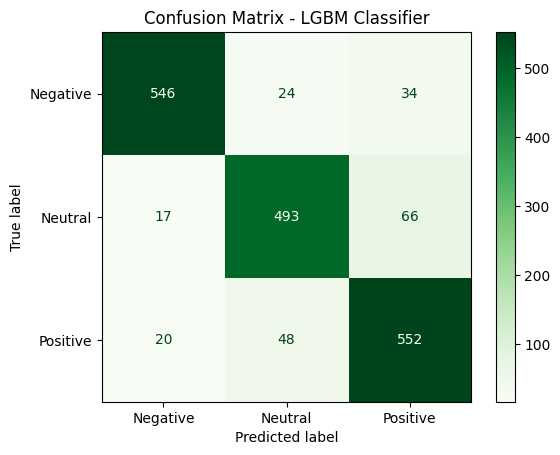

Accuracy on Test Data: 88.39%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       604
           1       0.87      0.86      0.86       576
           2       0.85      0.89      0.87       620

    accuracy                           0.88      1800
   macro avg       0.89      0.88      0.88      1800
weighted avg       0.89      0.88      0.88      1800

ROC AUC Score: 0.9687284494616443
Log Loss: 0.36377071818492324
Error Rate: 0.11611111111111116
Class 0:
TPR (Sensitivity): 0.9039735099337748
TNR (Specificity): 0.9690635451505016
FPR: 0.030936454849498328
FNR: 0.09602649006622517
Class 1:
TPR (Sensitivity): 0.8559027777777778
TNR (Specificity): 0.9411764705882353
FPR: 0.058823529411764705
FNR: 0.1440972222222222
Class 2:
TPR (Sensitivity): 0.8903225806451613
TNR (Specificity): 0.9152542372881356
FPR: 0.0847457627118644
FNR: 0.10967741935483871


In [ ]:
from lightgbm import LGBMClassifier

# Train the LGBM model
model = LGBMClassifier(n_estimators=501, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - LGBM Classifier")
plt.savefig("LGBMClassifier_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)

<Figure size 1000x1000 with 0 Axes>

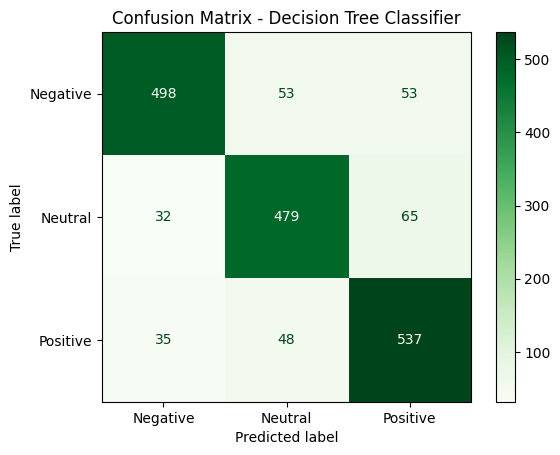

Accuracy on Test Data: 84.11%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       604
           1       0.83      0.83      0.83       576
           2       0.82      0.87      0.84       620

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800

ROC AUC Score: 0.8881496442697906
Log Loss: 5.166865833038989
Error Rate: 0.15888888888888886
Class 0:
TPR (Sensitivity): 0.8245033112582781
TNR (Specificity): 0.9439799331103679
FPR: 0.056020066889632104
FNR: 0.17549668874172186
Class 1:
TPR (Sensitivity): 0.8315972222222222
TNR (Specificity): 0.9174836601307189
FPR: 0.08251633986928104
FNR: 0.1684027777777778
Class 2:
TPR (Sensitivity): 0.8661290322580645
TNR (Specificity): 0.9
FPR: 0.1
FNR: 0.1338709677419355


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.savefig("DecisionTree_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)


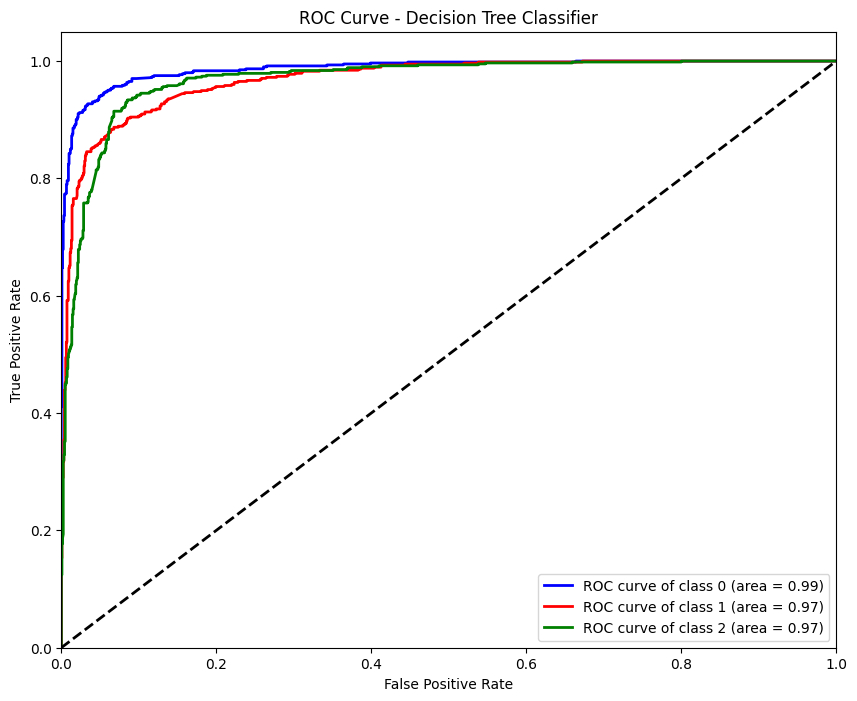

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.savefig("DecisionTree_ROC_Curve.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 1000x1000 with 0 Axes>

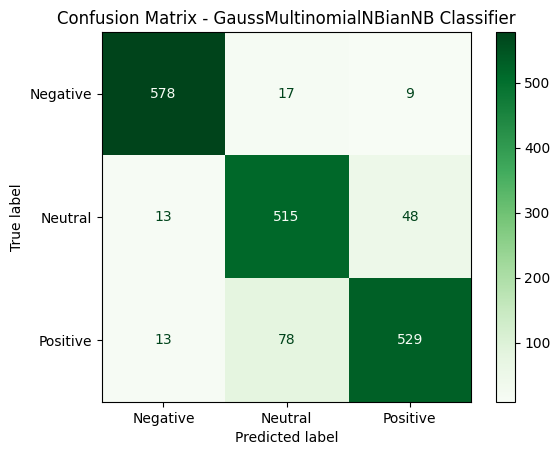

Accuracy on Test Data: 90.11%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       604
           1       0.84      0.89      0.87       576
           2       0.90      0.85      0.88       620

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800

ROC AUC Score: 0.9768942431213906
Log Loss: 0.3541820734020922
Error Rate: 0.09888888888888892
Class 0:
TPR (Sensitivity): 0.956953642384106
TNR (Specificity): 0.9782608695652174
FPR: 0.021739130434782608
FNR: 0.04304635761589404
Class 1:
TPR (Sensitivity): 0.8940972222222222
TNR (Specificity): 0.9223856209150327
FPR: 0.07761437908496732
FNR: 0.10590277777777778
Class 2:
TPR (Sensitivity): 0.853225806451613
TNR (Specificity): 0.9516949152542373
FPR: 0.048305084745762714
FNR: 0.14677419354838708


In [ ]:
from sklearn.naive_bayes import MultinomialNB

X_train_shifted = X_train - np.min(X_train)
X_test_shifted = X_test - np.min(X_test)

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train_shifted, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - GaussMultinomialNBianNB Classifier")
plt.savefig("MultinomialNB_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

y_prob = model.predict_proba(X_test)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)

<Figure size 1000x1000 with 0 Axes>

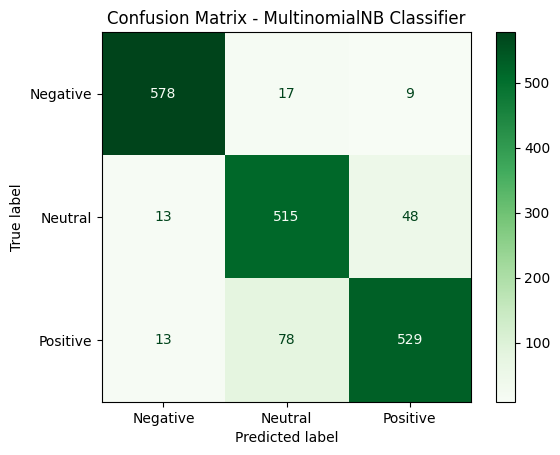

Accuracy on Test Data: 90.11%
Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       604
           1       0.84      0.89      0.87       576
           2       0.90      0.85      0.88       620

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800

ROC AUC Score: 0.9768942431213906
Log Loss: 0.3541820734020922
Error Rate: 0.09888888888888892
Class 0:
TPR (Sensitivity): 0.956953642384106
TNR (Specificity): 0.9782608695652174
FPR: 0.021739130434782608
FNR: 0.04304635761589404
Class 1:
TPR (Sensitivity): 0.8940972222222222
TNR (Specificity): 0.9223856209150327
FPR: 0.07761437908496732
FNR: 0.10590277777777778
Class 2:
TPR (Sensitivity): 0.853225806451613
TNR (Specificity): 0.9516949152542373
FPR: 0.048305084745762714
FNR: 0.14677419354838708


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, log_loss
import matplotlib.pyplot as plt

# Assuming you've already shifted X_train and X_test as shown
X_train_shifted = X_train - np.min(X_train)
X_test_shifted = X_test - np.min(X_test)

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train_shifted, y_train)

# Correct: use shifted X_test for prediction
y_pred = model.predict(X_test_shifted)

accuracy_latest = accuracy_score(y_test, y_pred)
report_latest = classification_report(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=[10, 10])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - MultinomialNB Classifier")
plt.savefig("MultinomialNB_Confusion_Matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# Predict probabilities with shifted X_test
y_prob = model.predict_proba(X_test_shifted)
print("Accuracy on Test Data: {:.2f}%".format(accuracy_latest * 100))
print("Classification Report on Test Data:\n", report_latest)
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Log Loss
logloss = log_loss(y_test, y_prob)
print("Log Loss:", logloss)

error_rate = 1 - accuracy_latest
print("Error Rate:", error_rate)

# Calculate TPR, TNR, FPR, FNR for each class
for i in range(cm.shape[0]):
    class_name = "Class " + str(i)
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    fp = sum(cm[:, i]) - tp
    tn = sum(sum(cm)) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(class_name + ":")
    print("TPR (Sensitivity):", sensitivity)
    print("TNR (Specificity):", specificity)
    print("FPR:", fpr)
    print("FNR:", fnr)


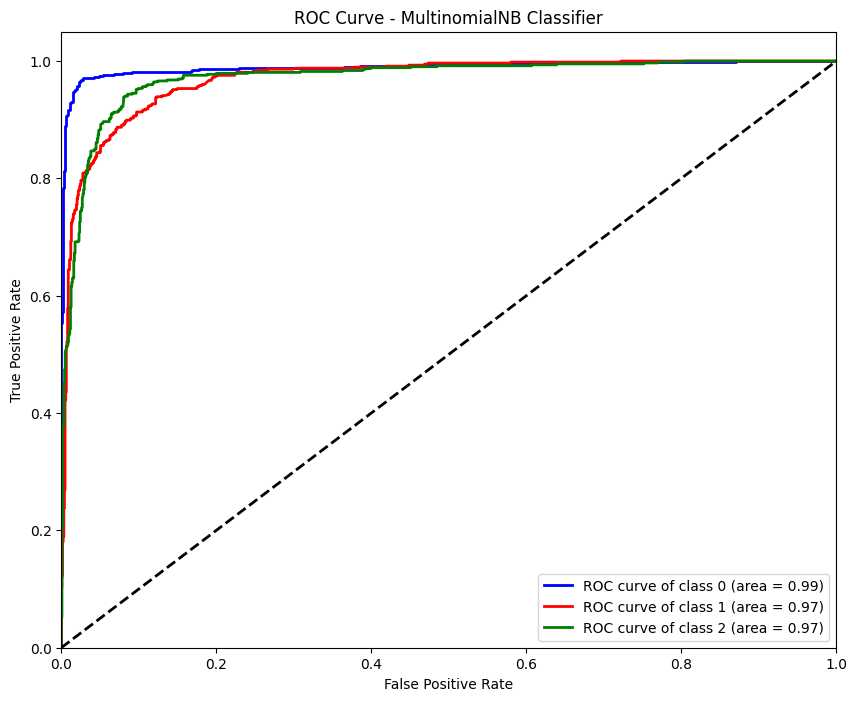

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for ROC curve plotting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MultinomialNB Classifier')
plt.legend(loc="lower right")
plt.savefig("MultinomialNB_ROC_Curve.png", dpi=300, bbox_inches="tight")
plt.show()
